In [1]:
########################################################################################
# Waleed. M Gondal, 2016                                                               #
# Class Activation Maps implementation in TensorFlow                                   #
# A part of code is inspired from https://github.com/metalbubble/CAM                   #
# Weights from Caffe converted using https://github.com/ethereon/caffe-tensorflow      #
########################################################################################

%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
from scipy.misc import imread, imresize
from imagenet_classes import class_names
from utils import normalize, draw_bbox
from cam_model import CAM

In [3]:
# Assign weight file.
weight_path = 'vgg16CAM.npy'
n_labels = 1000
cam = CAM(n_labels, weight_path)

# Define Placeholders for images and labels
images_tf = tf.placeholder( tf.float32, [None, 224, 224, 3], name="images")
labels_tf = tf.placeholder( tf.int32, [None], name='labels')

In [4]:
# Configure the model
fmaps, output = cam.network(images_tf)

# Read Test image
Read and resize the image

(-0.5, 223.5, 223.5, -0.5)

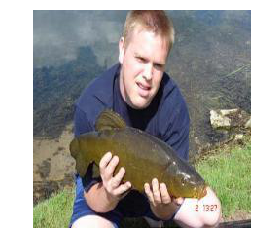

In [5]:
img = imread('1.JPEG', mode='RGB')
img = imresize(img, (224, 224))
plt.imshow (img)
plt.axis('off')

In [6]:
# import the necessary packages
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse

In [11]:
# load the image and convert it to a floating point data type
image = img_as_float(io.imread('1.JPEG'))

In [12]:
segments = slic(image, n_segments = 100, sigma = 5)

(224, 224)


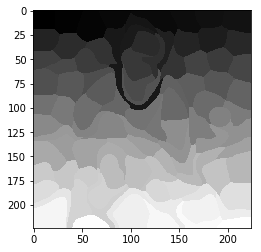

In [16]:
print np.shape(segments)
plt.imshow(segments, cmap='gray')

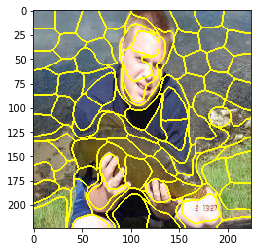

In [18]:
plt.imshow(mark_boundaries(image, segments))

# Inference
Retrieve the last convolution layer's feature maps and the output scores

In [20]:
sess = tf.InteractiveSession()
#tf.global_variables_initializer()
sess.run(tf.initialize_all_variables())
fmaps_val, output_val= sess.run([fmaps, output], feed_dict={ images_tf: np.expand_dims(img, axis = 0)})  

# Sort output scores 
sorted_output = (output_val.argsort(axis=1)[:,-3:])[0:5]

# Assign Max Predictions
label_1 = sorted_output[:,-1] 
label_2 = sorted_output[:,-2] 

# Class Activation Maps
Pass the retrieved feature maps and the indexes of output nodes associated with 2 highest predictions 

(-0.5, 223.5, 223.5, -0.5)

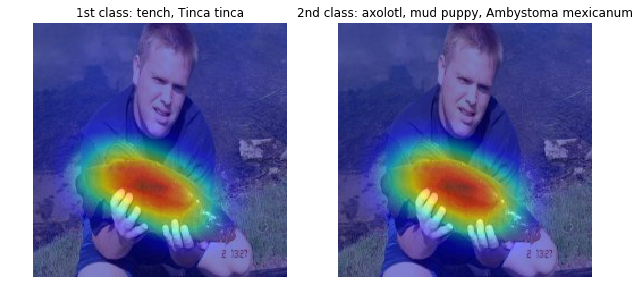

In [21]:
sorted_output = np.squeeze(sorted_output)

# Define classmap object
classmap = cam.get_cam(labels_tf, fmaps)

# Retrieve Class Maps 
classmap_1 = sess.run(classmap, feed_dict={ labels_tf: label_1, fmaps: fmaps_val})
classmap_2 = sess.run(classmap, feed_dict={ labels_tf: label_2, fmaps: fmaps_val})
cmap_1 = np.squeeze(classmap_1, axis=(0,))
cmap_2 = np.squeeze(classmap_2, axis=(0,))

# Plot Images and their respective Heatmaps
fig, axs = plt.subplots(1,2, figsize=(10,10))
axs[0].imshow(img)
axs[0].imshow(normalize(cmap_1), cmap=plt.cm.jet, alpha=0.5, interpolation='nearest')
axs[0].set_title('1st class: %s' %class_names[sorted_output[-1]])
axs[0].axis('off')

axs[1].imshow(img)
axs[1].imshow(normalize(cmap_2), cmap=plt.cm.jet, alpha=0.5, interpolation='nearest')
axs[1].set_title('2nd class: %s' %class_names[sorted_output[-2]])
axs[1].axis('off')

# Draw Bounding Boxes
Draw bounding boxes via thresholding the heatmaps

(-0.5, 223.5, 223.5, -0.5)

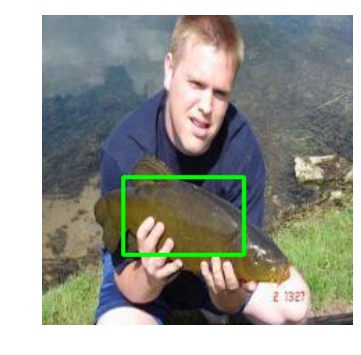

In [7]:
plt.imshow(draw_bbox(img, cmap_1, threshold = 0.6))
plt.axis('off')